<a href="https://colab.research.google.com/github/trkhan0071/Machine-Learning-/blob/main/Boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter


dataset link http://lib.stat.cmu.edu/datasets/boston

CRIM     per capita crime rate by town

ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS    proportion of non-retail business acres per town

CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX      nitric oxides concentration (parts per 10 million)

RM       average number of rooms per dwelling

AGE      proportion of owner-occupied units built prior to 1940

DIS      weighted distances to five Boston employment centres

RAD      index of accessibility to radial highways

TAX      full-value property-tax rate per $10,000

PTRATIO  pupil-teacher ratio by town

B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT    % lower status of the population

MEDV     Median value of owner-occupied homes in $1000's

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
dataset.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


In [4]:
dataset['MEDV'] = boston_dataset.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#data analysis

In [5]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


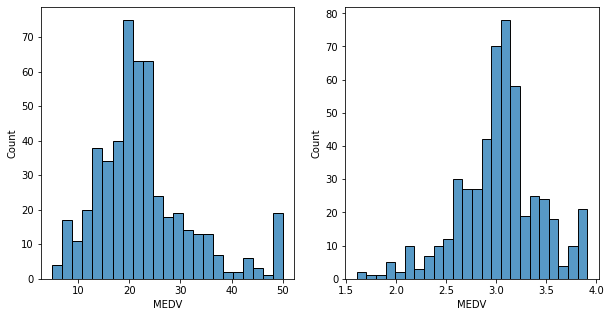

In [7]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(dataset.MEDV,ax=axes[0])
sns.histplot(np.log(dataset.MEDV),ax=axes[1])

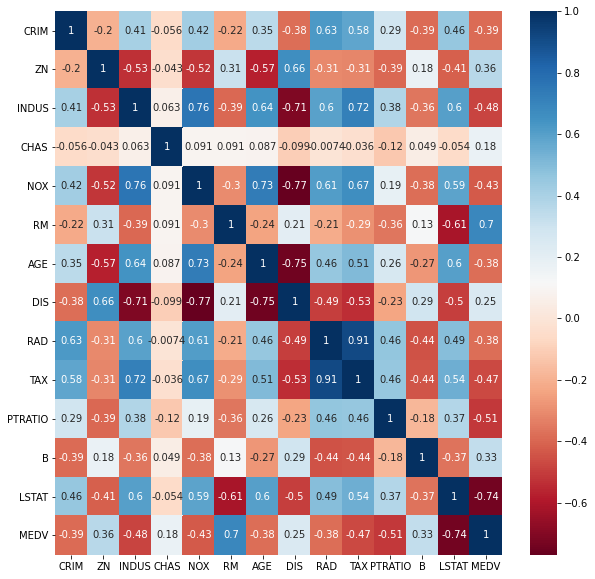

In [8]:
corr=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='RdBu',annot=True)


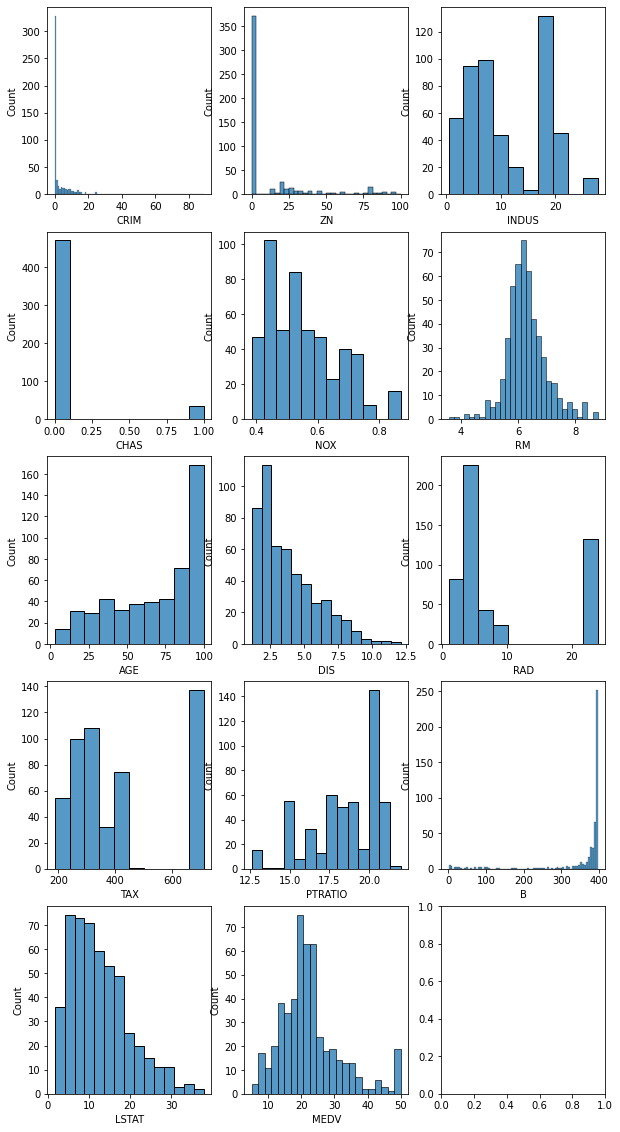

In [9]:
fig, ax=plt.subplots(5,3,figsize = (10,20))
ax=ax.flatten()
index = 0
for k,v in dataset.items():
  sns.histplot(dataset[k],ax = ax[index])
  index+=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


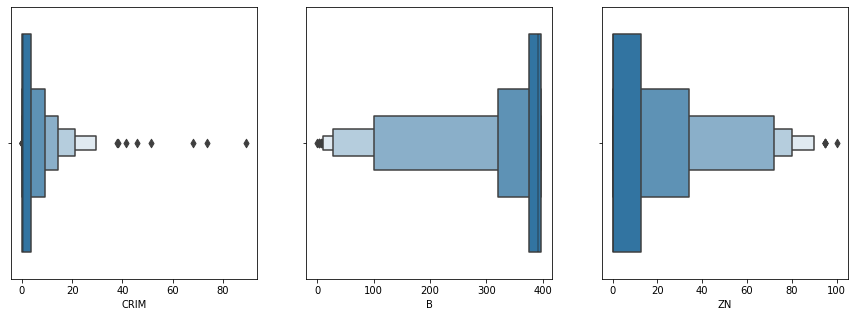

In [10]:
unusual_columns = ['CRIM','B','ZN']
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax = ax.flatten()
index = 0
for k in unusual_columns:
  sns.boxenplot(dataset[k],ax=ax[index])
  index+=1

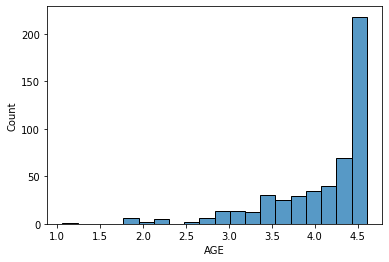

In [11]:
sns.histplot(np.log(dataset['AGE']))

In [12]:
con_1=dataset['ZN']<30  
con_2=dataset['B']>340
new_data=dataset[(dataset['ZN']<30) & (dataset['B']>340)]
new_data.shape

(359, 14)

#Regression Models

In [14]:
X = dataset.iloc[:,0:13]
y = dataset.iloc[:,-1]

In [15]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [17]:
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

#Linear Regression

In [86]:
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))
def CV(cv_score):
  return np.sqrt(np.mean(np.abs(cv_score)))
record=[]

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model_linear = LinearRegression()
cv_linear = cross_val_score(estimator = model_linear,X=X,y=y,cv=5,scoring='neg_mean_squared_error')
cv_linear_mean = np.sqrt(np.mean(np.abs(cv_linear)))
model_linear.fit(X_train,y_train)
y_pred = model_linear.predict(X_test)
rmse_linear= np.sqrt(mean_squared_error(y_test,y_pred))
r2_linear =r2_score(y_test,y_pred)
record.append(['linear',cv_linear_mean,rmse_linear,r2_linear])
print('cv={}, rmse = {}, r2_score = {}'.format(cv_linear_mean,rmse_linear,r2_linear))

cv=6.093587405436871, rmse = 4.647279745724219, r2_score = 0.7133593313710342


[-1.15254380e-01  5.05163648e-02  2.73670712e-02  7.30471064e-01
 -1.89833026e+01  4.03133215e+00 -4.82896709e-03 -1.54999896e+00
  3.67470486e-01 -1.66700680e-02 -9.85758737e-01  7.44544822e-03
 -4.59169535e-01]


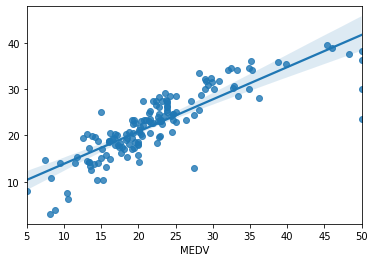

In [21]:
print(model_linear.coef_)
sns.regplot(x=y_test,y=y_pred)

#Polynomial regression

In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
model_polynomial = LinearRegression()
X_poly = poly.fit_transform(X)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
cv_polynommial = CV(cross_val_score(model_polynomial,X_poly,y,cv=5,scoring='neg_mean_squared_error'))
model_polynomial.fit(X_train_poly,y_train)
y_pred_poly = model_polynomial.predict(X_test_poly)
rmse_polynomial = rmse(y_test,y_pred_poly)
r2_poly = r2_score(y_test,y_pred_poly)
record.append(['polynomial',cv_polynommial,rmse_polynomial,r2_poly])

In [23]:
record

[['linear', 6.093587405436871, 4.647279745724219, 0.7133593313710342],
 ['polynomial', 16.6105938641427, 4.194313207139797, 0.7665134369454242]]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


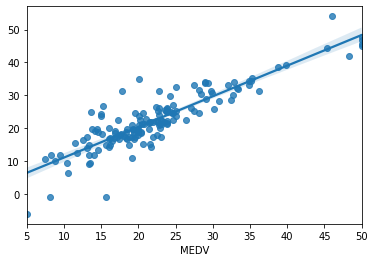

In [24]:
sns.regplot(y_test,y_pred_poly)

#Ridge regression

In [89]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar',StandardScaler()),
         ('poly',PolynomialFeatures(degree=2)),
         ('model',Ridge(alpha=2.1,fit_intercept  = True))]
ridge_pipe = Pipeline(steps)
cv_ridge = CV(cross_val_score(ridge_pipe,X,y,cv = 5, scoring='neg_mean_squared_error'))
ridge_pipe.fit(X_train,y_train)
y_pred_ridge  = ridge_pipe.predict(X_test)
rmse_ridge = rmse(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)
print(cv_ridge,rmse_ridge,r2_ridge)
                                                                            

7.699995310857476 2.870198440461652 0.8906637876940214


In [92]:
record.append(['Ridge',cv_ridge,rmse_ridge,r2_ridge])
record

[['linear', 6.093587405436871, 4.647279745724219, 0.7133593313710342],
 ['polynomial', 16.6105938641427, 4.194313207139797, 0.7665134369454242],
 ['lasso', 6.210549368876404, 3.3093594007219074, 0.854645645844702],
 ['Ridge', 7.699995310857476, 2.870198440461652, 0.8906637876940214]]

#Lasso regression

In [90]:
from sklearn.linear_model import Lasso
steps = [('scalar',StandardScaler()),
         ('poly',PolynomialFeatures(degree=2)),
         ('model',Lasso(alpha=0.1,fit_intercept  = True))]
lasso_pipe = Pipeline(steps)
cv_lasso = CV(cross_val_score(lasso_pipe,X,y,cv = 5, scoring='neg_mean_squared_error'))
lasso_pipe.fit(X_train,y_train)
y_pred_lasso  = lasso_pipe.predict(X_test)
rmse_lasso = rmse(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)
print('cv_lasso ={},rmse_lasso={},r2_lasso={}'.format(cv_lasso,rmse_lasso,r2_lasso))

cv_lasso =6.210549368876404,rmse_lasso=3.3093594007219074,r2_lasso=0.854645645844702


In [ ]:
lasso_pipe.named_steps['model'].coef_

In [91]:
record.append(['lasso',cv_lasso,rmse_lasso,r2_lasso])
record

[['linear', 6.093587405436871, 4.647279745724219, 0.7133593313710342],
 ['polynomial', 16.6105938641427, 4.194313207139797, 0.7665134369454242],
 ['lasso', 6.210549368876404, 3.3093594007219074, 0.854645645844702]]

#support vector regression

In [93]:
from sklearn.svm import SVR
steps = [('scalar',StandardScaler()),('model',SVR(kernel='rbf'))]
svr_pipe = Pipeline(steps)     
cv_svr = CV(cross_val_score(svr_pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
svr_pipe.fit(X_train,y_train)
y_pred_svr = svr_pipe.predict(X_test)
rmse_svr = rmse(y_test,y_pred_svr)
r2_svr = r2_score(y_test,y_pred_svr)
print('cv={} rmse={} r2 = {}'.format(cv_svr,rmse_svr,r2_svr))                                 

cv=6.857701413264033 rmse=5.429907285927572 r2 = 0.6086863433166121


In [94]:
record.append(['SVR',cv_svr,rmse_svr,r2_svr])
record

[['linear', 6.093587405436871, 4.647279745724219, 0.7133593313710342],
 ['polynomial', 16.6105938641427, 4.194313207139797, 0.7665134369454242],
 ['lasso', 6.210549368876404, 3.3093594007219074, 0.854645645844702],
 ['Ridge', 7.699995310857476, 2.870198440461652, 0.8906637876940214],
 ['SVR', 6.857701413264033, 5.429907285927572, 0.6086863433166121]]

#Model Evaluation

In [98]:
import pandas as pd
df = pd.DataFrame(record,columns=['regression_type','cv_score','rmse','r2_score'])
df.head()

,regression_type,cv_score,rmse,r2_score
0,linear,6.093587,4.647280,0.713359
1,polynomial,16.610594,4.194313,0.766513
2,lasso,6.210549,3.309359,0.854646
3,Ridge,7.699995,2.870198,0.890664
4,SVR,6.857701,5.429907,0.608686


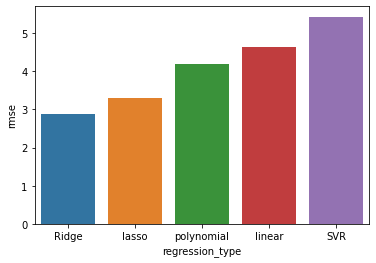

In [100]:
df = df.sort_values(by =['rmse'],ascending=True)
sns.barplot(x=df.regression_type,y=df.rmse)